In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

In [2]:
df = pd.read_excel('Data_Train.xlsx')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.dropna(inplace=True)

# exploratory data analysis

In [5]:
#for date of journey we extract date and month
df['journey_date'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['journey_month'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [7]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [8]:
#for time of departure we extract date and month
df['dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['dep_minute'] = pd.to_datetime(df.Dep_Time).dt.minute

In [9]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [10]:
#for time of arrival we extract hour and minute
df['arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [11]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
#extracting hours and minutes from duration
duration = list(df['Duration'])
duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + " 0m"
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    duration_hour.append(duration[i].split('h')[0])
    duration_minute.append(duration[i].split()[1].split('m')[0])
df['duration_hour'] = duration_hour
df['duration_minute'] = duration_minute

In [13]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


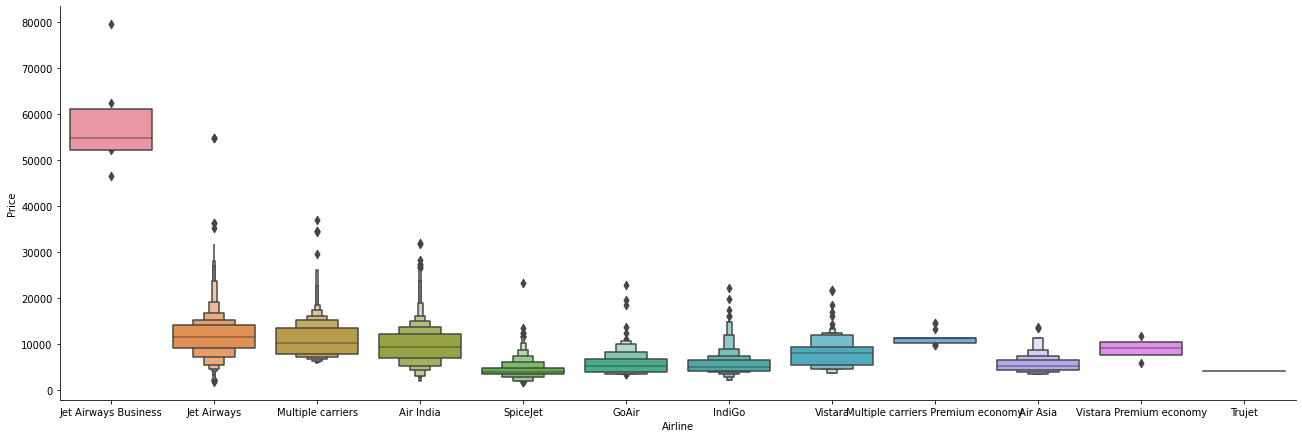

In [14]:
#encoding categorical variable Airline
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",aspect=3,height=6)         
plt.show()

In [15]:
#one hot encoding for nominal categorical variable
air = df['Airline']
air = pd.get_dummies(air,drop_first=True)
air.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [16]:
df.drop(['Airline'],axis=1,inplace=True)

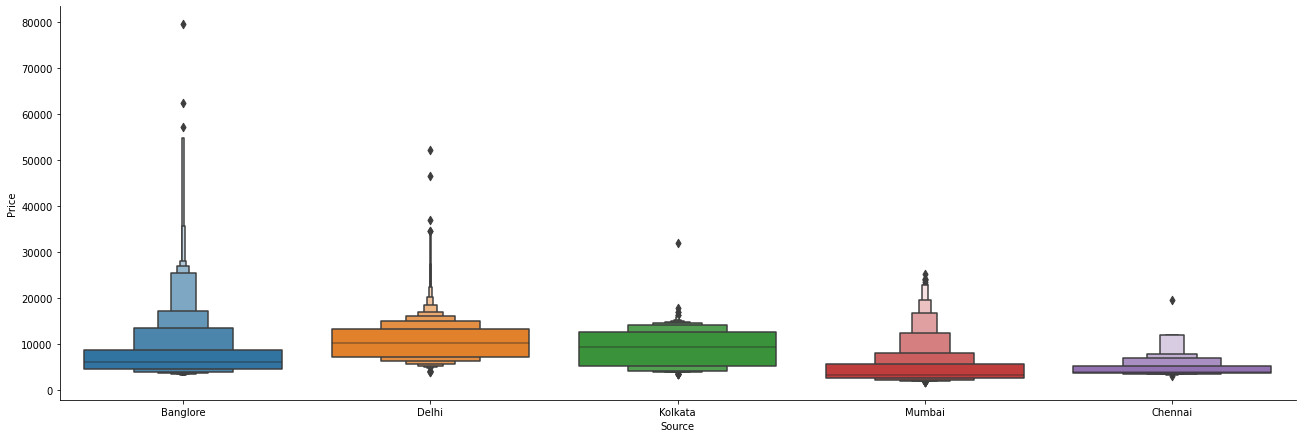

In [17]:
#encoding categorical variable Source
sns.catplot(y="Price",x="Source",data=df.sort_values("Price",ascending=False),kind="boxen",aspect=3,height=6)         
plt.show()

In [18]:
#one hot encoding for nominal categorical variable
src = df[['Source']]
src = pd.get_dummies(src,drop_first=True)
src.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [19]:
df.drop(['Source'],axis=1,inplace=True)

In [20]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

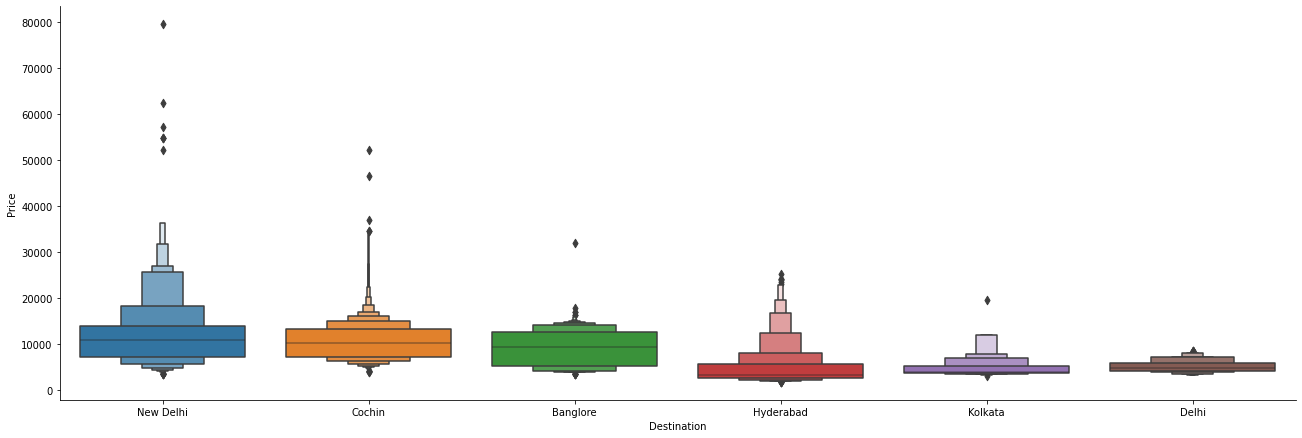

In [21]:
#encoding categorical variable Destination
sns.catplot(y="Price",x="Destination",data=df.sort_values("Price",ascending=False),kind="boxen",aspect=3,height=6)         
plt.show()

In [22]:
#one hot encoding for nominal categorical variable
des = df[['Destination']]
des = pd.get_dummies(des,drop_first=True)
des.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [23]:
df.drop(['Destination'],axis=1,inplace=True)

In [24]:
df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
#80% values are no info so we remove this column
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [26]:
#we also remove column Route as Total_stops and route are same
df.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [27]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
#we will use label encoding on Total_stops as its a ordinal categorical variable
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,},inplace=True)

In [29]:
df.head()

,Duration,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,19h,2,13882,9,6,9,25,4,25,19,0
3,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,4h 45m,1,13302,1,3,16,50,21,35,4,45


In [30]:
df2 =pd.concat([df,air,src,des],axis=1)

In [31]:
df2.drop(['Duration'],axis=1,inplace=True)

In [32]:
#here duration hour and minute are object which should be int 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   journey_date                       10682 non-null  int64 
 3   journey_month                      10682 non-null  int64 
 4   dep_hour                           10682 non-null  int64 
 5   dep_minute                         10682 non-null  int64 
 6   arrival_hour                       10682 non-null  int64 
 7   arrival_minute                     10682 non-null  int64 
 8   duration_hour                      10682 non-null  object
 9   duration_minute                    10682 non-null  object
 10  Air India                          10682 non-null  uint8 
 11  GoAir                              10682 non-null  uint8 
 12  Indi

In [33]:
df['duration_hour'] = pd.to_numeric(df['duration_hour'])
df['duration_minute'] = pd.to_numeric(df['duration_minute'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Duration         10682 non-null  object
 1   Total_Stops      10682 non-null  int64 
 2   Price            10682 non-null  int64 
 3   journey_date     10682 non-null  int64 
 4   journey_month    10682 non-null  int64 
 5   dep_hour         10682 non-null  int64 
 6   dep_minute       10682 non-null  int64 
 7   arrival_hour     10682 non-null  int64 
 8   arrival_minute   10682 non-null  int64 
 9   duration_hour    10682 non-null  int64 
 10  duration_minute  10682 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1001.4+ KB


In [35]:
train = df2.copy()

# Test set

In [36]:
#we are doing preprocessing for test and train both differently because of data leakage
test = pd.read_excel("Test_set.xlsx")

In [37]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
test.dropna(inplace=True)
#for date of journey we extract date and month
test['journey_date'] = pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.day
test['journey_month'] = pd.to_datetime(test.Date_of_Journey,format="%d/%m/%Y").dt.month
test.drop(['Date_of_Journey'],axis=1,inplace=True)
#for time of departure we extract date and month
test['dep_hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['dep_minute'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(['Dep_Time'],axis=1,inplace=True)
#for time of arrival we extract hour and minute
test['arrival_hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['arrival_minute'] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(['Arrival_Time'],axis=1,inplace=True)
#extracting hours and minutes from duration
duration = list(test['Duration'])
duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + " 0m"
        else:
            duration[i] = "0h " + duration[i]
for i in range(len(duration)):
    duration_hour.append(duration[i].split('h')[0])
    duration_minute.append(duration[i].split()[1].split('m')[0])
test['duration_hour'] = duration_hour
test['duration_minute'] = duration_minute
#encoding categorical variable Airline
#one hot encoding for nominal categorical variable
air = test['Airline']
air = pd.get_dummies(air,drop_first=True)
air.head()
test.drop(['Airline'],axis=1,inplace=True)
#one hot encoding for nominal categorical variable
src = test[['Source']]
src = pd.get_dummies(src,drop_first=True)
src.head()
test.drop(['Source'],axis=1,inplace=True)
test.Destination.value_counts()
#one hot encoding for nominal categorical variable
des = test[['Destination']]
des = pd.get_dummies(des,drop_first=True)
des.head()
test.drop(['Destination'],axis=1,inplace=True)
#80% values are no info so we remove this column
test.Additional_Info.value_counts()
#we also remove column Route as Total_stops and route are same
test.drop(['Additional_Info','Route'],axis=1,inplace=True)
#we will use label encoding on Total_stops as its a ordinal categorical variable
test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,},inplace=True)
test =pd.concat([test,air,src,des],axis=1)
test.drop(['Duration'],axis=1,inplace=True)

In [39]:
train.head()

,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection 

In [40]:
train.columns

Index(['Total_Stops', 'Price', 'journey_date', 'journey_month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_minute', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [41]:
X = train.loc[:,['Total_Stops','journey_date', 'journey_month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_minute', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [42]:
y=train.iloc[:,1]

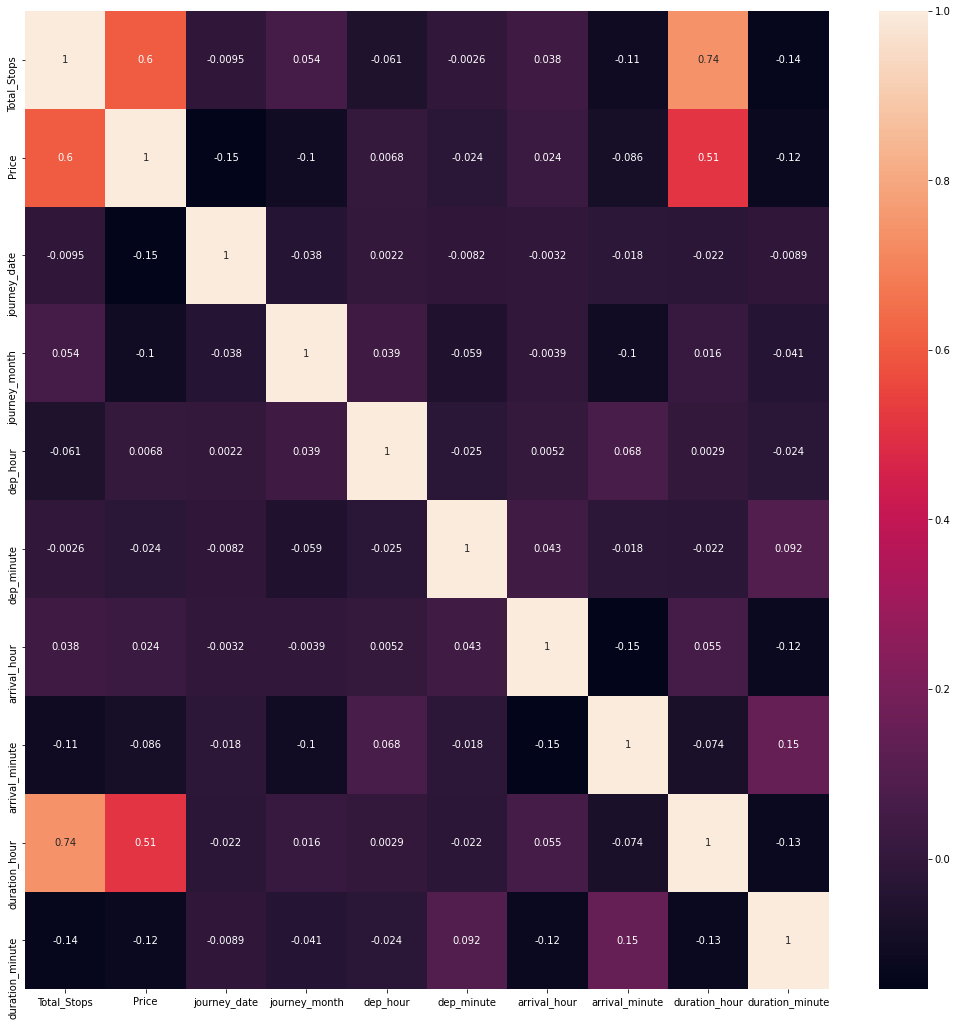

In [43]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
#feature selection
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [45]:
fi = pd.Series(selection.feature_importances_,index=X.columns)

In [46]:
fi.index

Index(['Total_Stops', 'journey_date', 'journey_month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_minute', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

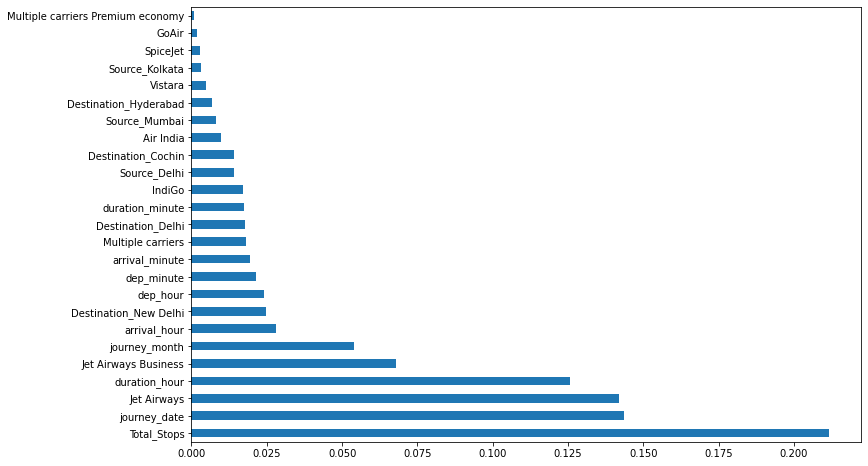

In [47]:
plt.figure(figsize=(12,8))
fi.nlargest(25).plot(kind='barh')
plt.show()

# Fitting model

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
ridge = Ridge(alpha=0.1)

In [100]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [101]:
ridge.score(X_test,y_test)

0.6196281778593494

In [50]:
y_pred_linear = lr.predict(X_test)

In [51]:
lr.score(X_test,y_test)

0.61959437290701

In [52]:
y_pred = reg.predict(X_test)

In [53]:
reg.score(X_test,y_test)

0.7977264300909302

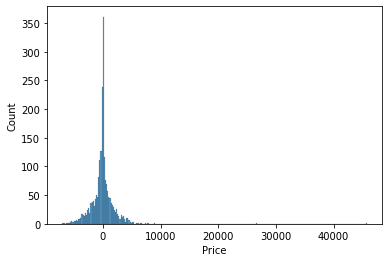

In [54]:
sns.histplot(y_test-y_pred)
plt.show()

In [55]:
from sklearn import metrics

In [56]:
metrics.r2_score(y_test, y_pred)

0.7977264300909302

In [95]:
metrics.r2_score(y_test,ridge_cv.predict(X_test))

0.619628178339109

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [108]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [109]:
rs_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
rs_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   8.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   8.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   8.7s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   8.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1481; total time=   9.4s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=  11.4s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=  10.9s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_esti

KeyboardInterrupt: 

In [77]:
rs_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 38}

In [78]:
predict = rs_random.predict(X_test)

<AxesSubplot:xlabel='Price'>

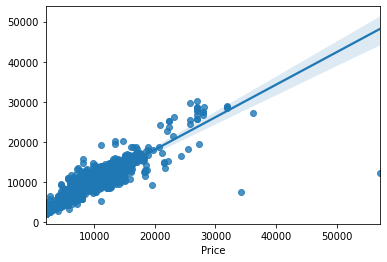

In [79]:
sns.regplot(x=y_test,y=predict)

In [80]:
metrics.r2_score(y_test,predict)

0.8121066564095979

In [81]:
metrics.r2_score(y_test, y_pred)

0.7977264300909302

In [102]:
metrics.r2_score(y_test,ridge.predict(X_test))

0.6196281778593494

In [66]:
from joblib import dump,load
dump(rs_random,'random_search_model.joblib')

['random_search_model.joblib']